In [2]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as plcolor

In [3]:
def my_layout(G, scale=100):
    layout = {}
    for node in G.nodes():
        layout[node] = [G.nodes[node]['x'] / scale, G.nodes[node]['y'] / scale]
    return layout

In [4]:
cdict = {
    'red'   : [[0.0, 0.0, 0.0],
               [1.0, 0.0, 0.0]],
    'green' : [[0.0, 0.0, 0.0],
               [1.0, 0.0, 0.0]],
    'blue'  : [[0.0, 0.0, 0.0],
               [1.0, 0.0, 0.0]],
    'alpha' : [[0.0, 0.0, 0.0],
               [1.0, 1.0, 1.0]]
}
black_alpha = plcolor.LinearSegmentedColormap('black_alpha', cdict)

In [5]:
G = nx.read_graphml('2020_Problem_D_DATA/H_1.graphml')

In [6]:
weights = [G[u][v]['weight'] / 3 for u,v in G.edges()]
colors = [G[u][v]['weight'] / 18 for u,v in G.edges()]
colors_node = [nx.clustering(G, weight='weight')[n] for n in G.nodes()]
labels = {n: n.split('_')[1] for n in G.nodes()}
sizes = [int(nx.closeness_centrality(G, distance='distance', wf_improved=True)[n] * 100) for n in G.nodes()]
pos = my_layout(G)

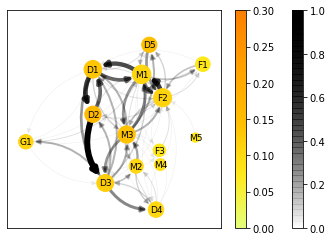

In [10]:
plt.plot()
nodes_plot = nx.draw_networkx_nodes(G, pos = pos, node_size = sizes, cmap=plt.cm.Wistia, node_color=colors_node, vmin=0, vmax=0.3)

edges_plot = nx.draw_networkx_edges(G, pos = pos, width = weights, connectionstyle = 'arc3,rad=0.3', edge_color=colors, edge_cmap=black_alpha)
labels_plot = nx.draw_networkx_labels(G, pos = my_layout(G), labels = labels, font_color = 'k', font_size = 9)
plt.colorbar(plt.cm.ScalarMappable(norm = plcolor.Normalize(0,1), cmap = black_alpha))
plt.colorbar(nodes_plot)
plt.savefig('fig/H_1.png', dpi = 700)